$$
H=-\sum_{j=1}^{N-1} (|j\rangle \langle j+1|+|j+1\rangle \langle j|)+F\sum_{j=1}^N j|j\rangle \langle j|
$$
$$
|\psi(t=0)\rangle =\frac{1}{\sqrt{\Omega}}\sum_j e^{-(\alpha^2/2)(j-N_0)^2}e^{ik_0j}|j\rangle
$$
为了计算时间演化，我们考虑哈密顿量$H$的谱分解：
$$
H=\sum_n E_n|\psi_n\rangle\langle \psi_n|
$$
此时时间演化可以按下面的式子计算：
$$
|\psi(t_0)\rangle =e^{-iHt}|\psi(0)\rangle = \sum_n e^{-iE_nt}|\psi_n\rangle \langle \psi_n|\psi(0)\rangle =\sum_n C_ne^{-iE_nt}|\psi_n\rangle=\sum_j\sum_nC_ne^{-iE_nt}\langle j|\psi_n\rangle |j\rangle
$$
其中$C_n$表示初态和第$n$个特征向量的重叠：
$$
C_n=\langle \psi_n|\psi(0)\rangle
$$

=========Task 2:output=========
(1)_10_eigenvalues:[-1.50050978 -1.13263731 -0.83544214 -0.57592755 -0.34141332 -0.12533996
  0.07623401  0.26590362  0.44548515  0.61630546]
(2)_Probability:[9.253801835103358e-07, 0.003913502822921027, 0.05771569802792494, 0.037273651473288025, 0.0002907001679345562]


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [01:47<00:00,  1.07s/it]


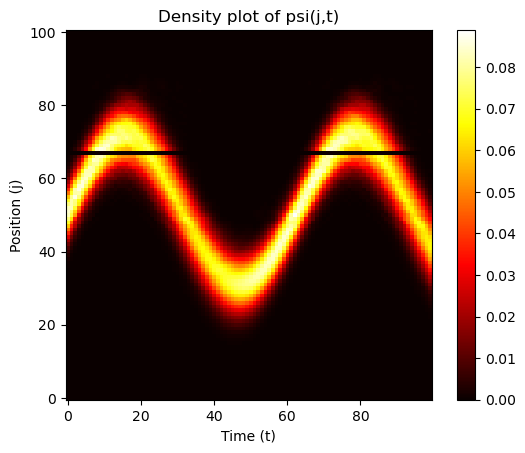

(3)_Plot: figure saved as 2021010312_0925_task2.png


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm


print("="*9+"Task 2:output"+"="*9)



# Define the Hamiltonian
N = 101
F = 0.1
H = np.zeros((N, N))

#Define the off-diagonal terms
for i in range(N-1):
    H[i, i+1] = -1
    H[i+1, i] = -1

#Define the diagonal terms
for i in range(N):
    H[i, i] = F * (i+1)

# Diagonalize the Hamiltonian
evals, evecs = np.linalg.eig(H)

# Find the 10 lowest eigenvalues
lowest_evals = np.sort(evals)[:10]

print("(1)_10_eigenvalues:{}".format(lowest_evals))



#set up the parameter for time-evolution calculating
alpha = 0.15
N0 = 51
k0 = math.pi/2
tmax = 100
t = 42
jlist = [10,20,30,40,50]

#calculate the factors: (Alist = \exp^{(\alpha^2/2)(j-N_0)^2}e^{i_0kj},   Clist = <psi(0)|psi(j)>,)
Alist = [np.exp(-(alpha**2/2)* (j+1-N0)**2)*np.exp(1j*k0*(j+1)) for j in range(N)]
Alist = Alist/np.sqrt(np.sum(np.abs(Alist)**2))
Clist = [np.dot(np.conj(evecs[j]),Alist) for j in range(N)]

def time_evol(time):
    Elist = []
    for j in range(N):
        #Elist = e^{-iE_nt}<j|psi_n>
        Elist.append([np.exp(-1j*evals[n]*time)*evecs[n][j] for n in range(N)])
    prob_list = [np.abs(np.dot(Clist,Elist[j]))**2 for j in range(N)]
    return(prob_list)
prob_list_jlist = [time_evol(42)[j-1] for j in jlist]

print("(2)_Probability:{}".format(prob_list_jlist))



#plot the density diagram
j_values = np.arange(0, N)
t_values = np.arange(0, tmax)
density = np.zeros((len(j_values), len(t_values)))
for j in tqdm(range(len(j_values))):
    for t in range(len(t_values)):
        prob_density = time_evol(t)[j-1]
        density[j, t] = prob_density
plt.imshow(density, cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Time (t)')
plt.ylabel('Position (j)')
plt.title('Density plot of psi(j,t)')
plt.colorbar()
plt.show()
print("(3)_Plot: figure saved as 2021010312_0925_task2.png")